# Prediction of back pain using Logistic Regression, Python

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

C:\Users\gkumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
back_data = pd.read_csv("Dataset_spine.csv")

In [3]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [ ]:
#- Self

In [5]:
back_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [8]:
back_data.shape

(310, 13)

In [9]:
back_data.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


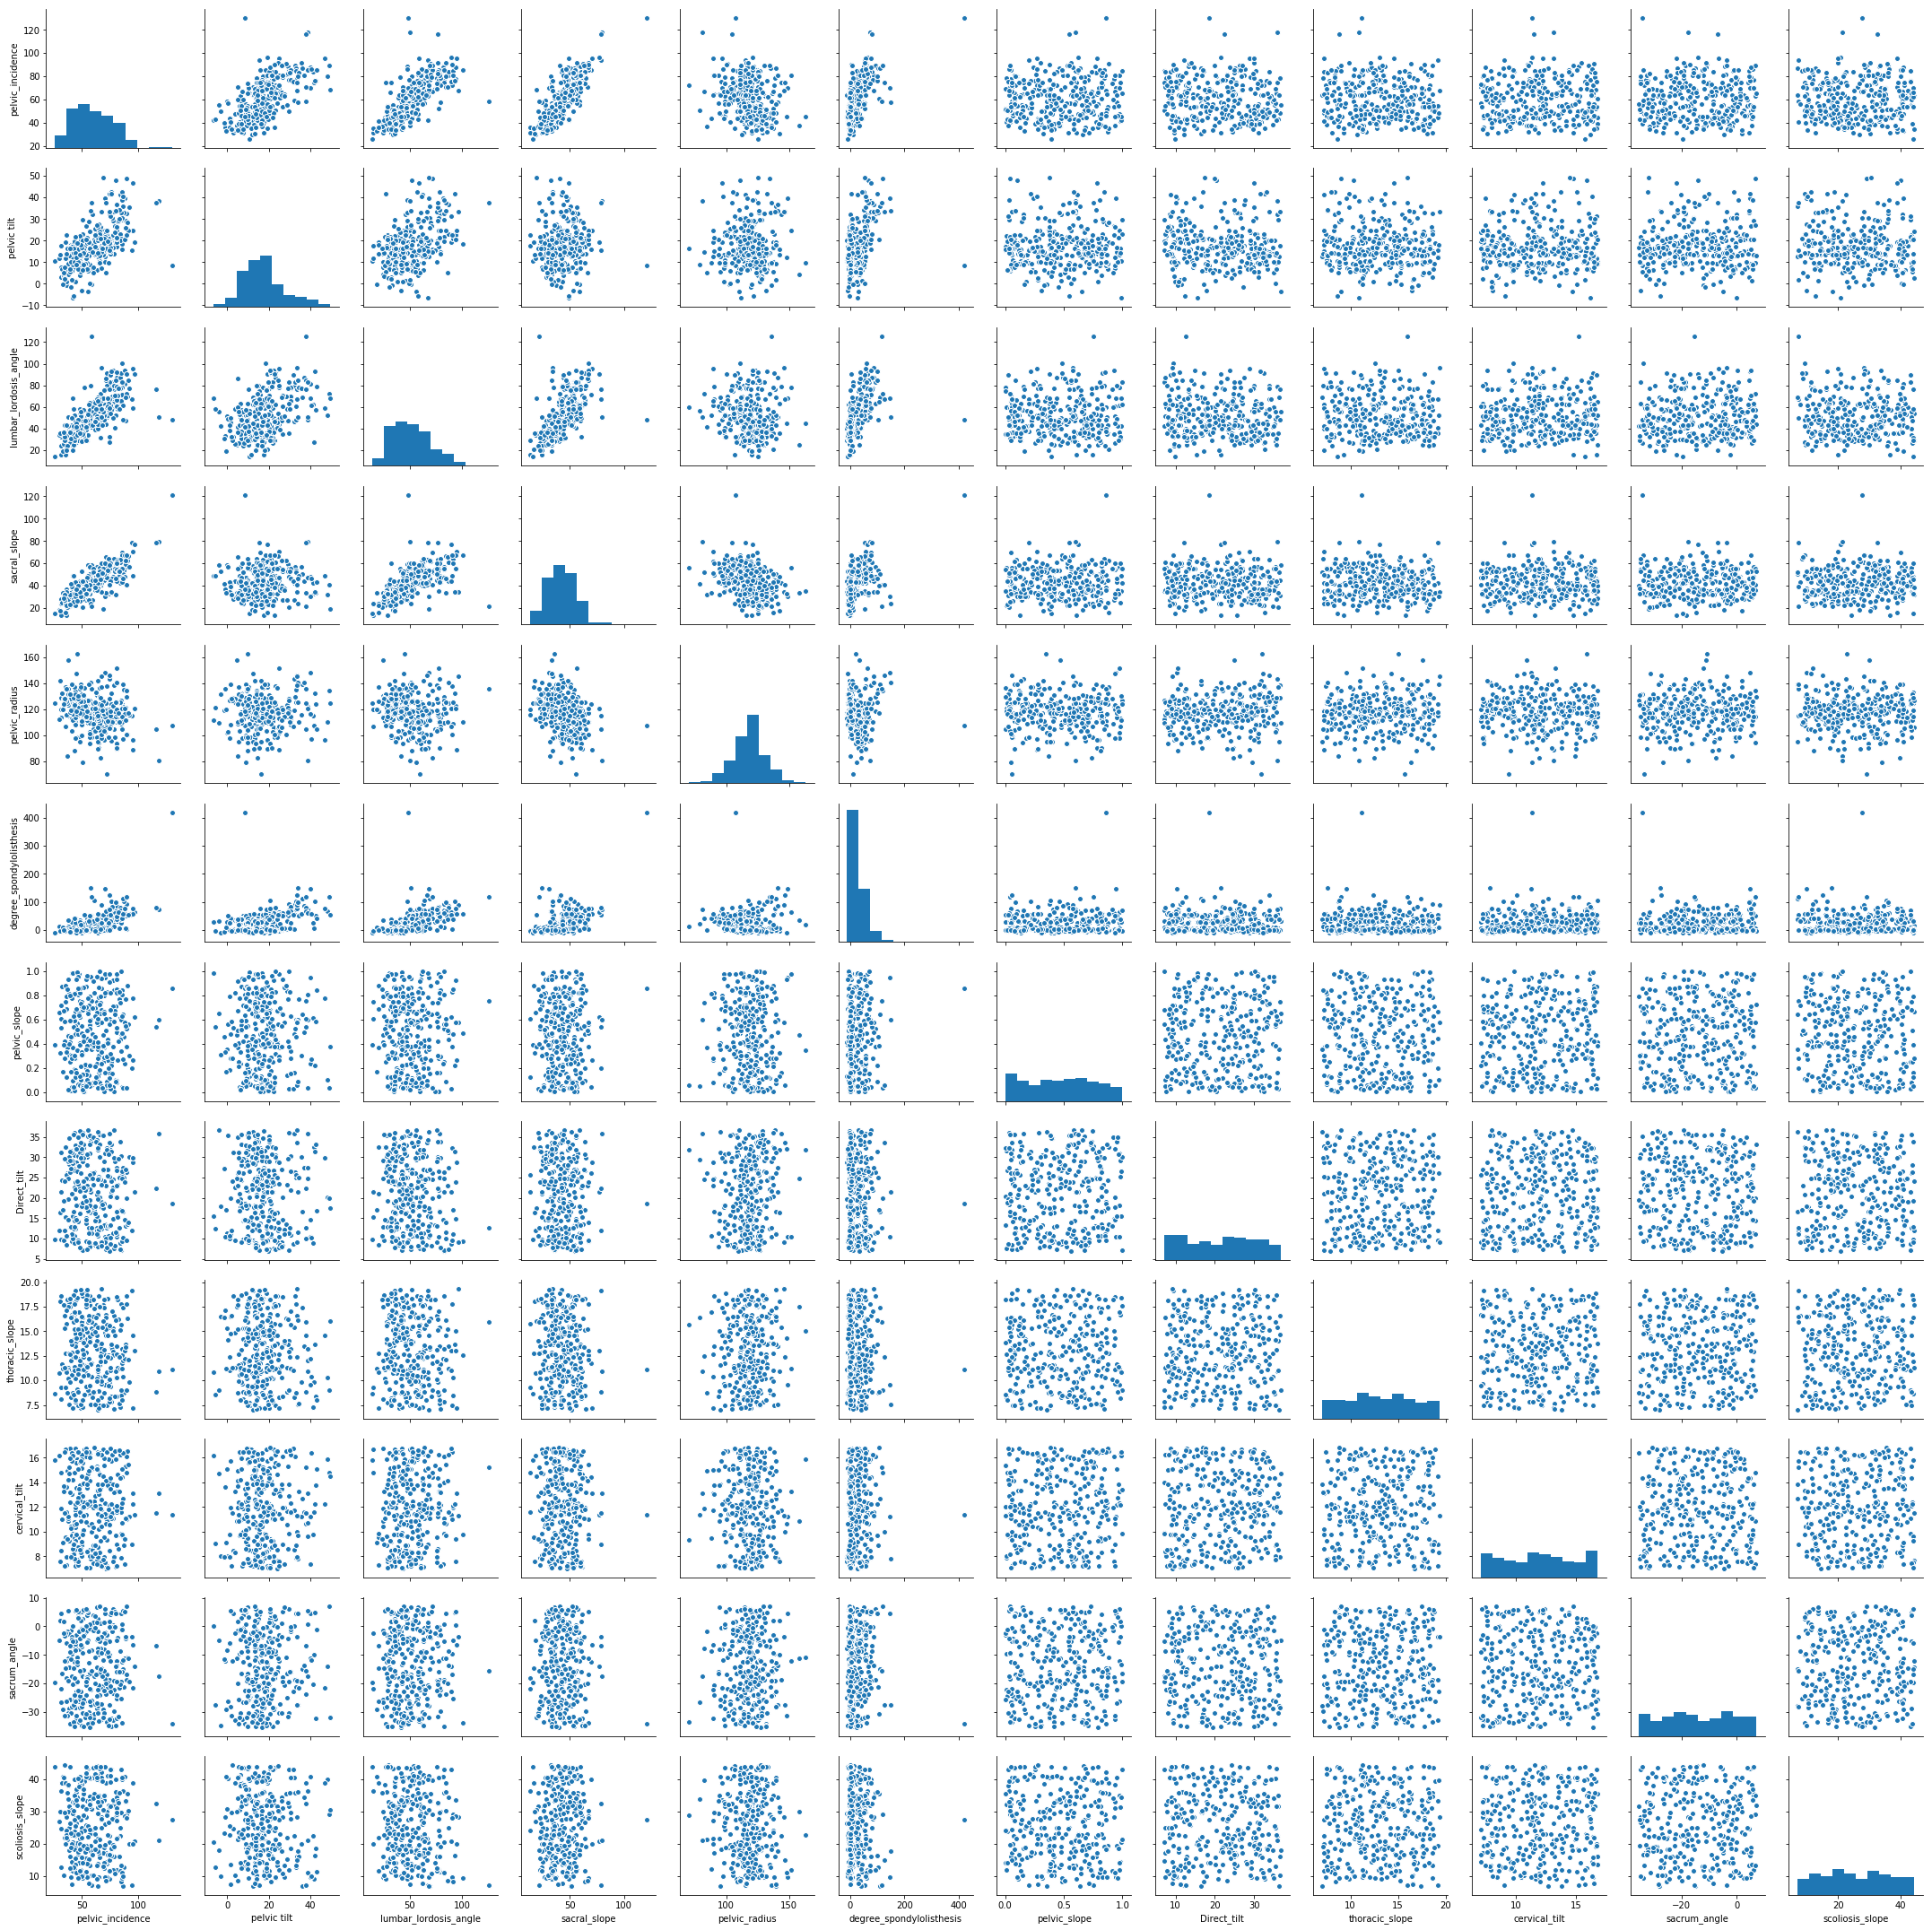

In [10]:
sns.pairplot(back_data)

In [ ]:
# - Existing-

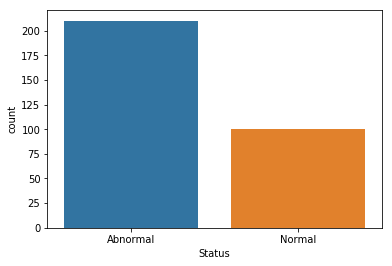

In [6]:
sns.countplot(x = 'Status', data = back_data)
plt.show()

In [7]:
## Understanding the structure of the data variables
back_data.info()

##Checking for missing values. There are no missing values
print(back_data.isnull().sum())

## split of the Status column between the two levels Abnormal and Normal
print(back_data.Status.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB
pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope             

In [8]:
back_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


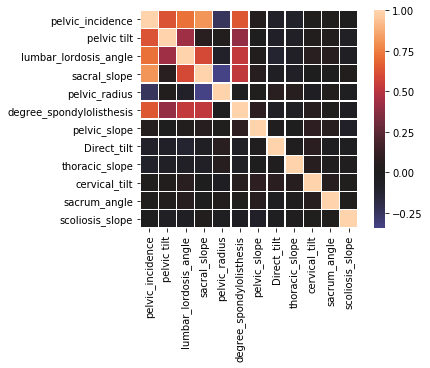

In [9]:
corr_back = back_data.corr()

# Generate the correlation plot 
sns.heatmap(corr_back, center=0, square=True, linewidths=.5)

plt.show()

In [10]:
# Seeing the correlation values
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [15]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [16]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


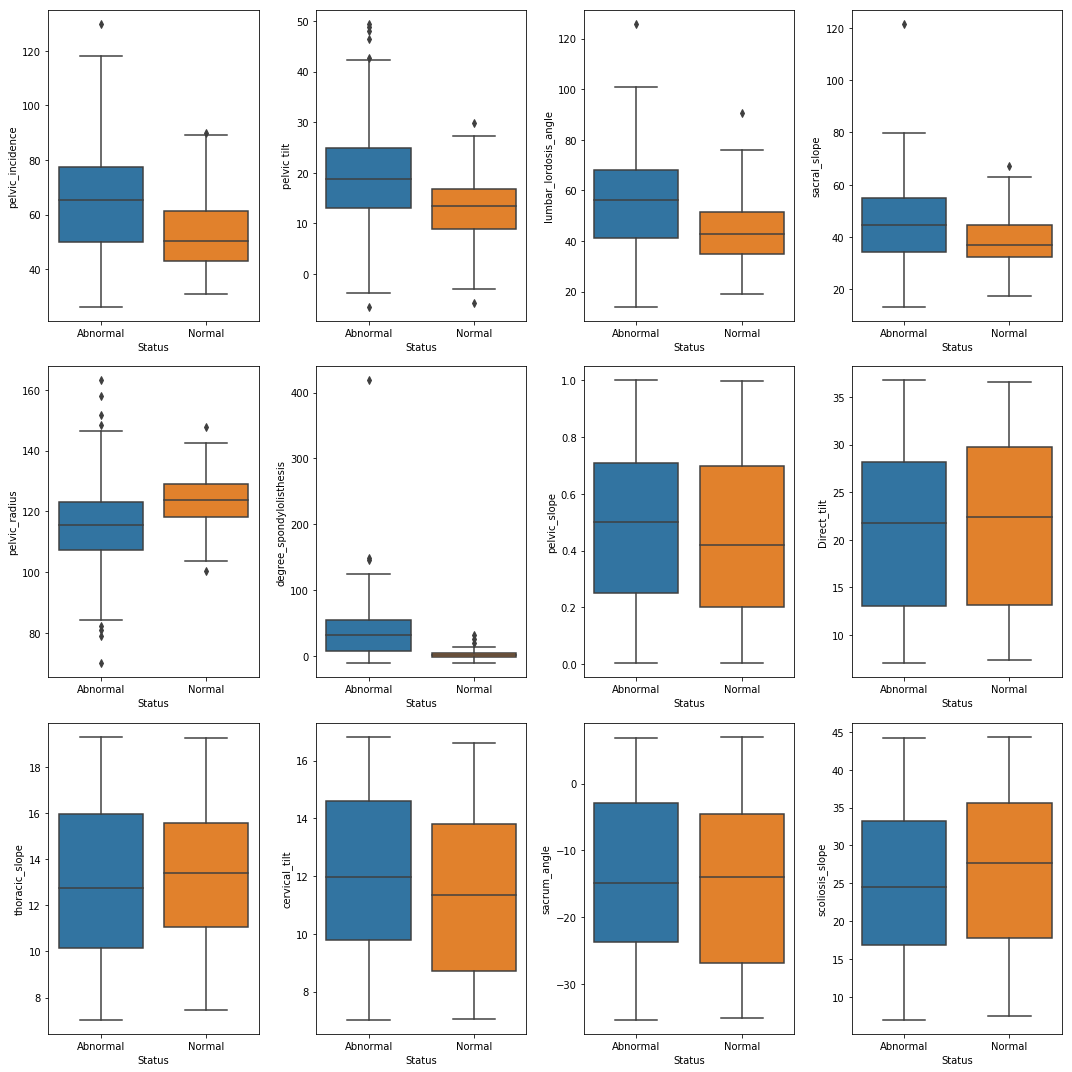

In [17]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [15]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

In [16]:
X = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [30]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(copy=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [31]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [32]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [33]:
logreg_result = logistic_regression(X_train_scaled, y_train)


In [34]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.756
Test set score: 0.720


In [35]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.

logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249223
         Iterations 10
                        Results: Logit
Model:              Logit            No. Iterations:   10.0000 
Dependent Variable: y                Pseudo R-squared: 0.604   
Date:               2020-11-25 09:31 AIC:              132.1630
No. Observations:   217              BIC:              172.7217
Df Model:           11               Log-Likelihood:   -54.081 
Df Residuals:       205              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
x1       -21.0871   10.0725  -2.0935  0.0363  -40.8287   -1.3454
x2        15.2298    4.6724   3.2596  0.0011    6.0722   24.3874
x3        -5.3262    3.5753  -1.4897  0.1363  -12.3336    1.6812
x4        14.6766   

## Understanding the model result summary

 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - A matrix can become singular if any rows(columns) can be expressed as a linear combination of any other rows (columns). 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 

In [26]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence', 'pelvic tilt','sacral_slope']]
X = back_data[cols_to_include]

In [36]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.756
Test set score: 0.720


The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [37]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249223
         Iterations 10
                        Results: Logit
Model:              Logit            No. Iterations:   10.0000 
Dependent Variable: y                Pseudo R-squared: 0.604   
Date:               2020-11-25 09:32 AIC:              132.1630
No. Observations:   217              BIC:              172.7217
Df Model:           11               Log-Likelihood:   -54.081 
Df Residuals:       205              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------
x1       -21.0871   10.0725  -2.0935  0.0363  -40.8287   -1.3454
x2        15.2298    4.6724   3.2596  0.0011    6.0722   24.3874
x3        -5.3262    3.5753  -1.4897  0.1363  -12.3336    1.6812
x4        14.6766   

In [38]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = X.loc[:,['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [39]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.705
Test set score: 0.731


In [40]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.325882
         Iterations 10
                        Results: Logit
Model:              Logit            No. Iterations:   10.0000 
Dependent Variable: y                Pseudo R-squared: 0.482   
Date:               2020-11-25 09:32 AIC:              147.4328
No. Observations:   217              BIC:              157.5725
Df Model:           2                Log-Likelihood:   -70.716 
Df Residuals:       214              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -4.6700     1.9721   -2.3681   0.0179   -8.5351   -0.8048
x2      -2.9889     0.8615   -3.4696   0.0005   -4.6774   -1.3005
x3      73.8318    12.7834    5.7756   0.0000   48.7769   98.8868



In [41]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

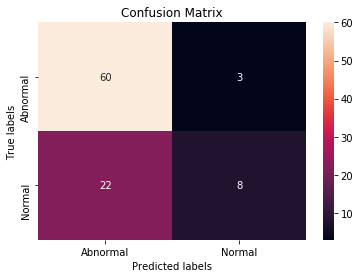

In [42]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

In [43]:
#Changing the indipendent variables for standard scaling:

In [44]:
back_data = pd.read_csv("Dataset_spine.csv")

In [46]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [47]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

In [48]:
X = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [49]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [50]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [62]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic tilt','sacral_slope']]
X = back_data[cols_to_include]

In [63]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.763


In [64]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.480817
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: y                Pseudo R-squared: 0.235   
Date:               2020-11-25 09:54 AIC:              228.6748
No. Observations:   217              BIC:              262.4738
Df Model:           9                Log-Likelihood:   -104.34 
Df Residuals:       207              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -0.2076     0.2993   -0.6936   0.4879   -0.7941    0.3790
x2      -0.4398     0.2966   -1.4829   0.1381   -1.0210    0.1415
x3      -0.9962     0.2148   -4.6375   0.0000   -1.4172   -0.5752
x4       2.3762

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
pelvic_incidence            310 non-null float64
lumbar_lordosis_angle       310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
dtypes: float64(10)
memory usage: 24.3 KB


In [70]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = X.loc[:,['pelvic_radius','degree_spondylolisthesis']]

In [71]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.820
Test set score: 0.774


In [72]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.507309
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: y                Pseudo R-squared: 0.193   
Date:               2020-11-25 09:56 AIC:              224.1719
No. Observations:   217              BIC:              230.9317
Df Model:           1                Log-Likelihood:   -110.09 
Df Residuals:       215              LL-Null:          -136.45 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -0.8753     0.2004   -4.3680   0.0000   -1.2681   -0.4826
x2       1.6628     0.2513    6.6168   0.0000    1.1702    2.1553



In [73]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

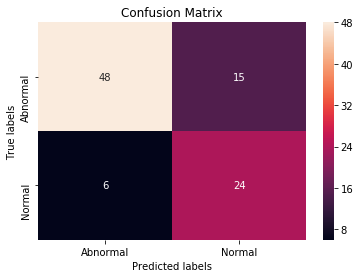

In [74]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()